In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/glass.xlsx',sheet_name='glass')

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

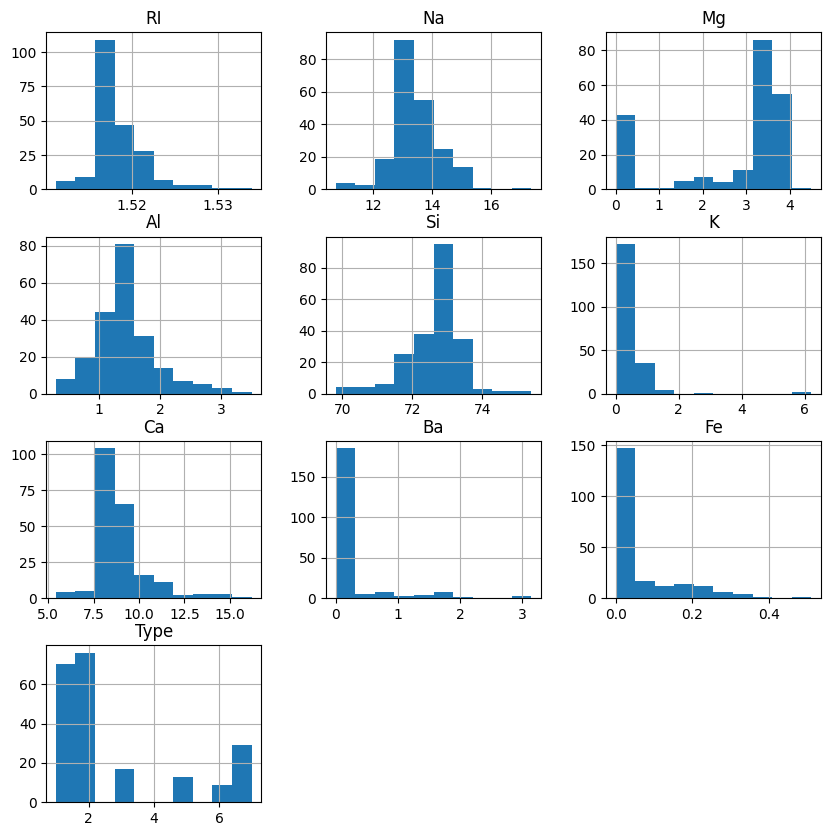

In [ ]:
plot=df.hist(figsize=(10,10))
plt.show()

In [20]:
x=df.drop('Type',axis=1)
y=df['Type']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [22]:
from sklearn.ensemble  import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,
                                     n_estimators=100,oob_score=True)

In [23]:
classifier_rf.fit(x_train,y_train)
classifier_rf.oob_score_

0.7181208053691275

In [25]:
y_train_pred = classifier_rf.predict(x_train)
y_test_pred = classifier_rf.predict(x_test)

# Calculating the accuracies
accuracy_train = round(classifier_rf.score(x_train, y_train) * 100, 2)
accuracy_test = round(classifier_rf.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 94.63
Testing Accuracy: 73.85


In [27]:
preds=classifier_rf.predict(x_test)

In [28]:
preds

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 5, 1, 2, 2, 1, 7, 2])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.63      0.89      0.74        19
           2       0.71      0.65      0.68        23
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.74        65
   macro avg       0.68      0.67      0.66        65
weighted avg       0.72      0.74      0.71        65



In [32]:
print(confusion_matrix(y_test,preds))

[[17  2  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 3  1  0  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [34]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [35]:
seed = 7
kfold = KFold(n_splits=10,random_state=seed,shuffle=True) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed) #Classifier
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.59090909, 0.77272727, 0.90909091, 0.77272727, 0.76190476,
       0.80952381, 0.66666667, 0.57142857, 0.71428571, 0.85714286])

In [38]:
print(results.mean())

0.4748917748917748


In [40]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10 # try 20,30
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model, x,y, cv=kfold)
results1

array([0.45454545, 0.77272727, 0.59090909, 0.45454545, 0.38095238,
       0.38095238, 0.33333333, 0.23809524, 0.61904762, 0.52380952])

In [41]:
print(results1.mean())

0.4748917748917748
